# General settings

In [1]:
import sys
import math
from scipy.optimize import minimize, bisect
import numpy as np
from numpy import linalg as nplin

In [2]:
from ekdist import exponentials
from ekdist import ekplot

In [3]:
# LOAD DATA.
filename = "./tests/intervals.txt"
intervals = np.loadtxt(filename)

## Fit multi-exponential pdf

In [4]:
tau, area = [0.036, 1.1], [0.2]
epdf = exponentials.ExponentialPDF(tau, area)
print('Start LogLikelihood =', epdf.LL(epdf.theta, intervals))

Start LogLikelihood = 87.31806715582867


In [5]:
res = minimize(epdf.LL, epdf.theta, args=intervals, method='Nelder-Mead')
print (res)

 final_simplex: (array([[0.03700718, 1.07302608, 0.19874548],
       [0.03701042, 1.07300003, 0.19879291],
       [0.03701506, 1.07312038, 0.19880849],
       [0.03700726, 1.07309781, 0.19883809]]), array([87.28828773, 87.28828814, 87.28828846, 87.28828878]))
           fun: 87.28828773327726
       message: 'Optimization terminated successfully.'
          nfev: 88
           nit: 47
        status: 0
       success: True
             x: array([0.03700718, 1.07302608, 0.19874548])


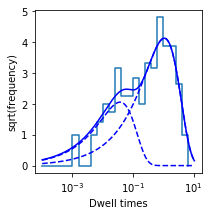

In [6]:
tres = 1e-4
fig = ekplot.histogram_xlog_ysqrt_data(intervals, tres, pdf=epdf, xlabel='Dwell times')

### Calculate tcrit

In [7]:
epdf.get_tcrits(verbose=True)


Equal % misclassified (DC criterion)
Critical time between components 1 and 2
tcrit = 92.353 ms
% misclassified: short = 8.247; long = 8.247
# misclassified (out of 100): short = 1.6394; long = 6.6075
Total # misclassified (out of 100) = 8.247

Equal # misclassified (Clapham & Neher criterion)
Critical time between components 1 and 2
tcrit = 57.628 ms
% misclassified: short = 21.075; long = 5.2291
# misclassified (out of 100): short = 4.1896; long = 4.1896
Total # misclassified (out of 100) = 8.3791

Minimum total # misclassified (Jackson et al criterion)
Critical time between components 1 and 2
tcrit = 75.636 ms
% misclassified: short = 12.956; long = 6.8063
# misclassified (out of 100): short = 2.5755; long = 5.4533
Total # misclassified (out of 100) = 8.0288

SUMMARY of tcrit values (in ms):
Components		DC		C&N		Jackson
1 to 2 			92.353		57.628		75.636


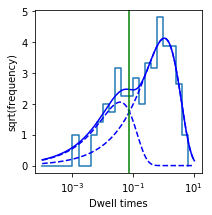

In [8]:
fig = ekplot.histogram_xlog_ysqrt_data(intervals, tres, epdf, 
                                       tcrit=epdf.tcrits['Jackson'], xlabel='Dwell times')

### Calculate approximate SD

In [9]:
from ekdist import errors
asd = errors.ApproximateSD(res.x, epdf.LL, np.array(intervals))

In [10]:
print(asd.hessian)

[[8475.49606292  -92.21425006 -626.06648917]
 [ -92.21425006   71.5478832   -36.17166531]
 [-626.06648917  -36.17166531  501.13966047]]


In [11]:
print(asd.covariance)

[[0.00013478 0.00026864 0.00018777]
 [0.00026864 0.01504143 0.00142128]
 [0.00018777 0.00142128 0.00233261]]


In [12]:
print(asd.sd)

[0.01160948 0.1226435  0.04829715]


In [13]:
print(asd.correlations)

[[1.         0.18867387 0.33487997]
 [0.18867387 1.         0.23994593]
 [0.33487997 0.23994593 1.        ]]


### Calculate likelihood intervals

In [14]:
m = 2.0 # corresponds roughly to 2 SD
likints = errors.LikelihoodIntervals(res.x, epdf, np.array(intervals), asd.sd, m)
likints.calculate()

calculating likelihood intervals...

Calculating Lik limits for parameter- tau = 0.037
	Initial guesses for lower limit: 0.000 and 0.037
	Initial guesses for higher limit: 0.037 and 0.153
lower limit found:  0.019226384311366168
higher limit found:  0.07101933263063774

Calculating Lik limits for parameter- tau = 1.073
	Initial guesses for lower limit: 0.582 and 1.073
	Initial guesses for higher limit: 1.073 and 2.299
lower limit found:  0.8583999525995726
higher limit found:  1.3892163638906025

Calculating Lik limits for parameter- area = 0.199
	Initial guesses for lower limit: 0.006 and 0.199
	Initial guesses for higher limit: 0.199 and 0.682
lower limit found:  0.10969760281850571
higher limit found:  0.3020372371637748
... finished calculating likelihood intervals.


[[0.019226384311366168, 0.07101933263063774],
 [0.8583999525995726, 1.3892163638906025],
 [0.10969760281850571, 0.3020372371637748]]